In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk import FreqDist
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from nltk.util import ngrams
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('reviews.csv',sep='\t')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
train_x,test_x,train_y,test_y=train_test_split(data.iloc[:,0:6],data['Positively Rated'],test_size=0.20)

In [5]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308277 entries, 0 to 308276
Data columns (total 7 columns):
Product Name        308277 non-null object
Brand Name          308277 non-null object
Price               308277 non-null float64
Rating              308277 non-null int64
Reviews             308277 non-null object
Review Votes        308277 non-null float64
Positively Rated    308277 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 16.5+ MB


In [7]:
data.describe(include=['object'])

,Product Name,Brand Name,Reviews
count,308277,308277,308277
unique,3645,376,128282
top,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",Samsung,Good
freq,1045,58857,2209


In [8]:
data.describe()

,Price,Rating,Review Votes,Positively Rated
count,308277.000000,308277.000000,308277.000000,308277.000000
mean,226.059362,3.894614,1.490072,0.748269
std,285.064731,1.585468,9.252592,0.434008
min,1.730000,1.000000,0.000000,0.000000
25%,77.990000,2.000000,0.000000,0.000000
50%,139.040000,5.000000,0.000000,1.000000
75%,269.100000,5.000000,1.000000,1.000000
max,2598.000000,5.000000,645.000000,1.000000


In [9]:
all_words=[]
lemmatizer = WordNetLemmatizer()
stop_words=stopwords.words('english')
for symb in string.punctuation:
    stop_words.append(symb)
for sent in train_x['Reviews'].str.lower():
    for word in word_tokenize(sent):
        if word not in stop_words:
            word=lemmatizer.lemmatize(word)
            all_words.append(word)


In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
dist=FreqDist(all_words)

In [11]:
dist.most_common()

[('phone', 277655),
 ("n't", 69366),
 ('great', 63123),
 ('good', 58383),
 ('work', 52559),
 ("'s", 47173),
 ('one', 39362),
 ('like', 36400),
 ('screen', 34331),
 ('love', 33045),
 ('use', 32581),
 ('battery', 32063),
 ('...', 31057),
 ('would', 31001),
 ('get', 29914),
 ('time', 26411),
 ('new', 26002),
 ('product', 22741),
 ('camera', 22371),
 ('price', 22319),
 ('really', 21688),
 ('card', 20145),
 ('problem', 20048),
 ('bought', 19784),
 ('day', 19761),
 ('well', 19036),
 ('sim', 18863),
 ('buy', 18487),
 ('got', 18250),
 ('even', 17952),
 ('excellent', 17786),
 ("'m", 16916),
 ('iphone', 16843),
 ('back', 16720),
 ('nice', 16296),
 ('could', 15726),
 ('also', 15193),
 ('fast', 14563),
 ('quality', 14450),
 ('month', 14294),
 ('much', 14130),
 ('used', 14015),
 ('need', 13969),
 ("''", 13672),
 ('apps', 13643),
 ('still', 13486),
 ('better', 13343),
 ('thing', 13339),
 ('call', 13303),
 ('came', 13096),
 ('case', 12792),
 ('android', 12411),
 ('perfect', 12283),
 ('first', 12225),

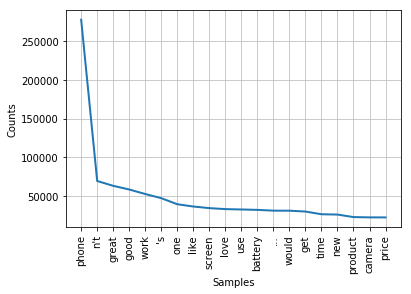

In [12]:
dist.plot(20)

In [13]:
dist.most_common()[:500][-1]

('spec', 1925)

In [14]:
n_grams=[]
words=[]
for sent in train_x['Reviews'].str.lower():
    for word in word_tokenize(sent):
        if word not in stop_words:
            words.append(lemmatizer.lemmatize(word))
for tup in ngrams(words,2):
        n_grams.append(tup)
n_grams_dist=FreqDist(n_grams)

In [15]:
vocab=[]
for tup in dist.most_common()[:500]:
    vocab.append(tup[0])
for tup in n_grams_dist.most_common()[:200]:
    vocab.append(tup[0])

In [16]:
def token(sent):
    words=[]
    for word in word_tokenize(sent):
        words.append(lemmatizer.lemmatize(word))
    return words

In [17]:
vect=CountVectorizer(tokenizer=token,vocabulary=vocab,ngram_range=(1,2))

In [18]:
#constructing  dtm
dtm=vect.fit_transform(train_x['Reviews'].str.lower()).toarray()

In [19]:
col=vect.get_feature_names()

In [20]:
trainingset=pd.DataFrame(dtm,columns=col)

In [21]:
gnb=GaussianNB()

In [22]:
gnb.fit(trainingset,train_y)

GaussianNB(priors=None)

In [23]:
predicted=gnb.predict(trainingset)
accuracy_score(train_y,predicted)

0.83682654761759945

In [24]:
print(classification_report(train_y,predicted))

             precision    recall  f1-score   support

          0       0.70      0.61      0.65     62161
          1       0.87      0.91      0.89    184460

avg / total       0.83      0.84      0.83    246621



In [25]:
#on test data
dtm=vect.fit_transform(test_x['Reviews'].str.lower()).toarray()
col=vect.get_feature_names()
testingset=pd.DataFrame(dtm,columns=col)
predicted=gnb.predict(testingset)
accuracy_score(test_y,predicted)
print(classification_report(test_y,predicted))

             precision    recall  f1-score   support

          0       0.70      0.61      0.65     15442
          1       0.88      0.91      0.89     46214

avg / total       0.83      0.84      0.83     61656

